# 1. dataset 구하기

- 서울시 자치구 년도별 CCTV 설치 현황 (https://data.seoul.go.kr/dataList/OA-2734/C/1/datasetView.do)
    - xlsx파일
    
    
- 서울시 주민등록인구 (구별) 통계 (https://data.seoul.go.kr/dataList/419/S/2/datasetView.do)
    - txt파일을 csv파일로 변환

# 2. 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
cctv_seoul = pd.read_excel('data/cctv_seoul.xlsx', encoding = 'utf-8')
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
pop_seoul = pd.read_excel('data/pop_seoul.xlsx', encoding = 'utf-8')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2019,합계,4327605,10010983,4877725,5133258,9729107,4744059,4985048,281876,133666,148210,2.25,1485272
3,2019,종로구,73947,161869,78215,83654,151290,73746,77544,10579,4469,6110,2.05,27519
4,2019,중구,62739,136488,66823,69665,126171,61910,64261,10317,4913,5404,2.01,23275


# 3. feature engineering

## (1). cctv
- 헤더 변경
- 빈칸 채우기
- 공백 제거
- '최근 증가율' 추가 -> 기준을 어떻게 잡는 것이 좋은가?

In [4]:
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [5]:
cctv_seoul.columns[0]

'기관명'

In [6]:
# 'inplace = True' : 실제 cctv_seoul이라는 변수의 내용을 갱신하라
cctv_seoul.rename(columns={cctv_seoul.columns[0] : '구별'}, inplace = True)
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [7]:
# 빈칸 확인하기
cctv_seoul.isnull().sum()

구별          0
소계          0
2011년 이전    2
2012년       2
2013년       2
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

In [8]:
# 평균으로 채우기
cctv_seoul['2011년 이전'] = cctv_seoul['2011년 이전'].fillna(cctv_seoul['2011년 이전'].mean())
cctv_seoul['2012년'] = cctv_seoul['2012년'].fillna(cctv_seoul['2012년'].mean())
cctv_seoul['2013년'] = cctv_seoul['2013년'].fillna(cctv_seoul['2013년'].mean())

In [9]:
# 구 이름 사이에 공백이 있어서 공백 제거
cctv_seoul['구별'] = cctv_seoul['구별'].str.replace(' ','')
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [10]:
# '최근 증가율' 열 추가 - 최근 5년간 증가율 계산
cctv_seoul['최근 증가율'] = (cctv_seoul['2018년'] + cctv_seoul['2017년'] + cctv_seoul['2016년'] + cctv_seoul['2015년'] 
                        + cctv_seoul['2014년']) / (cctv_seoul['2013년'] + cctv_seoul['2012년'] + cctv_seoul['2011년 이전']) * 100
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근 증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,112.668024
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,128.033981
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,168.008475
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,228.658537
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,340.331492


In [11]:
# 적은 순서대로 확인
cctv_seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근 증가율
9,도봉구,858,197.000000,66.000000,8.000000,185,59,155,117,71,216.605166
24,중랑구,1068,580.478261,123.826087,194.217391,770,102,121,66,9,118.861899
2,강북구,1265,243.000000,88.000000,141.000000,74,145,254,1,319,168.008475
22,종로구,1471,8.000000,7.000000,599.000000,132,195,148,281,101,139.576547
23,중구,1544,25.000000,165.000000,114.000000,80,245,270,317,328,407.894737


In [12]:
# 많은 순서대로 확인
cctv_seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근 증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,112.668024
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,340.331492
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,127.253521
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643,157.326478
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367,91.467356


In [13]:
# 증가율 높은 순으로 정렬
cctv_seoul.sort_values(by='최근 증가율', ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근 증가율
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,471.328671
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,443.572985
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,407.894737
11,동작구,1780,238.0,93.0,29.0,503,130,254,278,255,394.444444
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,340.331492


## (2). population
- 필요없는 행과 열 제거
- 헤더 변경
- '외국인비율', '고령자 비율' 추가 -> csv 파일로 했을 때는 str로 인식해서 오류가 났는데 xlsx 파일로 변환해서 불러오니 오류가 안 남..!?


- 책 내용대로 하니 오류가 나서 다른 방법 사용 -> csv파일인 경우 헤더 변경해서 해더 이름으로 추출, xlsx로 바꾼 후에는 `usecols` 사용
```python
# 책 내용
pop_seoul = pd.read_csv('data/pop_seoul.csv', 
                           header = 2,
                           parse_cols = 'B, D, G, J, N',   # csv 파일일 때 이 부분에서 자꾸 오류 발생
                           encoding = 'utf-8')
```

In [14]:
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2019,합계,4327605,10010983,4877725,5133258,9729107,4744059,4985048,281876,133666,148210,2.25,1485272
3,2019,종로구,73947,161869,78215,83654,151290,73746,77544,10579,4469,6110,2.05,27519
4,2019,중구,62739,136488,66823,69665,126171,61910,64261,10317,4913,5404,2.01,23275


In [15]:
# 3번째 행부터, 특정 열만 읽도록 하기
pop_seoul = pd.read_excel('data/pop_seoul.xlsx', 
                          header = 2,
                          usecols = 'B, D, G, J, N',)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10010983,9729107,281876,1485272
1,종로구,161869,151290,10579,27519
2,중구,136488,126171,10317,23275
3,용산구,245185,228670,16515,38791
4,성동구,308979,300889,8090,43947


In [16]:
# 헤더 변경
pop_seoul.rename(columns={pop_seoul.columns[0] : '구별', 
                          pop_seoul.columns[1] : '인구수',
                          pop_seoul.columns[2] : '한국인',
                          pop_seoul.columns[3] : '외국인',
                          pop_seoul.columns[4] : '고령자'}, inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10010983,9729107,281876,1485272
1,종로구,161869,151290,10579,27519
2,중구,136488,126171,10317,23275
3,용산구,245185,228670,16515,38791
4,성동구,308979,300889,8090,43947


In [17]:
# drop으로 '합계' 행 삭제 (열 삭제는 del)
pop_seoul.drop([0], inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161869,151290,10579,27519
2,중구,136488,126171,10317,23275
3,용산구,245185,228670,16515,38791
4,성동구,308979,300889,8090,43947
5,광진구,366972,351350,15622,47902


In [18]:
# 구별 외국인비율과 고령자비율 계산
# csv 파일로 했을 때는 str로 인식해서 오류가 났는데 xlsx 파일로 변환해서 불러오니 오류가 안 남..!?
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161869,151290,10579,27519,6.535532,17.000785
2,중구,136488,126171,10317,23275,7.558906,17.052781
3,용산구,245185,228670,16515,38791,6.735730,15.821115
4,성동구,308979,300889,8090,43947,2.618301,14.223297
5,광진구,366972,351350,15622,47902,4.257001,13.053312


In [19]:
# 인구수로 정렬
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,682741,675961,6780,87334,0.993056,12.791674
16,강서구,598273,591796,6477,84077,1.082616,14.053283
23,강남구,550209,545169,5040,71025,0.916016,12.908731
11,노원구,537303,532905,4398,80923,0.818533,15.060962
21,관악구,517334,500094,17240,75194,3.332470,14.534904


In [20]:
# 외국인수로 정렬
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,400986,367678,33308,57872,8.306524,14.432424
17,구로구,439371,406664,32707,65779,7.444051,14.971175
18,금천구,251820,232810,19010,37660,7.549043,14.955127
21,관악구,517334,500094,17240,75194,3.332470,14.534904
6,동대문구,363023,346194,16829,59350,4.635794,16.348826


In [21]:
# 외국인비율로 정렬
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,400986,367678,33308,57872,8.306524,14.432424
2,중구,136488,126171,10317,23275,7.558906,17.052781
18,금천구,251820,232810,19010,37660,7.549043,14.955127
17,구로구,439371,406664,32707,65779,7.444051,14.971175
3,용산구,245185,228670,16515,38791,6.735730,15.821115


In [22]:
# 고령자수로 정렬
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,682741,675961,6780,87334,0.993056,12.791674
16,강서구,598273,591796,6477,84077,1.082616,14.053283
11,노원구,537303,532905,4398,80923,0.818533,15.060962
12,은평구,484546,480032,4514,80738,0.931594,16.662608
21,관악구,517334,500094,17240,75194,3.332470,14.534904


In [23]:
# 고령자비율로 정렬
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,317695,313954,3741,60577,1.177545,19.067659
10,도봉구,335631,333362,2269,58714,0.676040,17.493617
2,중구,136488,126171,10317,23275,7.558906,17.052781
1,종로구,161869,151290,10579,27519,6.535532,17.000785
12,은평구,484546,480032,4514,80738,0.931594,16.662608


## (3). merge df

In [24]:
# '구별'로 묶기
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,112.668024,550209,545169,5040,71025,0.916016,12.908731
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,128.033981,440390,436067,4323,63452,0.981630,14.408138
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,168.008475,317695,313954,3741,60577,1.177545,19.067659
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,228.658537,598273,591796,6477,84077,1.082616,14.053283
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,340.331492,517334,500094,17240,75194,3.332470,14.534904


In [25]:
# cctv에서 '최근 증가율'만 남기고 삭제
# 행 삭제는 drop, 열 삭제는 del
del data_result['2011년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,112.668024,550209,545169,5040,71025,0.916016,12.908731
1,강동구,1879,128.033981,440390,436067,4323,63452,0.981630,14.408138
2,강북구,1265,168.008475,317695,313954,3741,60577,1.177545,19.067659
3,강서구,1617,228.658537,598273,591796,6477,84077,1.082616,14.053283
4,관악구,3985,340.331492,517334,500094,17240,75194,3.332470,14.534904


In [26]:
# '구별'을 인덱스로 설정
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,112.668024,550209,545169,5040,71025,0.916016,12.908731
강동구,1879,128.033981,440390,436067,4323,63452,0.981630,14.408138
강북구,1265,168.008475,317695,313954,3741,60577,1.177545,19.067659
강서구,1617,228.658537,598273,591796,6477,84077,1.082616,14.053283
관악구,3985,340.331492,517334,500094,17240,75194,3.332470,14.534904


In [27]:
# 상관게수 구하기
print(np.corrcoef(data_result['고령자비율'],data_result['소계']))
print(np.corrcoef(data_result['외국인비율'],data_result['소계']))
print(np.corrcoef(data_result['인구수'],data_result['소계'])) # 인구수와 cctv 개수에 어느 정도 상관관계가 있음

[[ 1.         -0.43676823]
 [-0.43676823  1.        ]]
[[ 1.         -0.06157971]
 [-0.06157971  1.        ]]
[[1.         0.38050253]
 [0.38050253 1.        ]]


In [28]:
# 소계 정렬
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,112.668024,550209,545169,5040,71025,0.916016,12.908731
관악구,3985,340.331492,517334,500094,17240,75194,3.332470,14.534904
구로구,3227,127.253521,439371,406664,32707,65779,7.444051,14.971175
성북구,3003,157.326478,454744,442650,12094,70850,2.659518,15.580195
은평구,2962,91.467356,484546,480032,4514,80738,0.931594,16.662608


In [29]:
# 인구수 정렬
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1586,101.524778,682741,675961,6780,87334,0.993056,12.791674
강서구,1617,228.658537,598273,591796,6477,84077,1.082616,14.053283
강남구,5221,112.668024,550209,545169,5040,71025,0.916016,12.908731
노원구,1906,137.952559,537303,532905,4398,80923,0.818533,15.060962
관악구,3985,340.331492,517334,500094,17240,75194,3.332470,14.534904


# 4. visualization

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# matplotlib 폰트 변경
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [32]:
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,112.668024,550209,545169,5040,71025,0.916016,12.908731
강동구,1879,128.033981,440390,436067,4323,63452,0.981630,14.408138
강북구,1265,168.008475,317695,313954,3741,60577,1.177545,19.067659
강서구,1617,228.658537,598273,591796,6477,84077,1.082616,14.053283
관악구,3985,340.331492,517334,500094,17240,75194,3.332470,14.534904


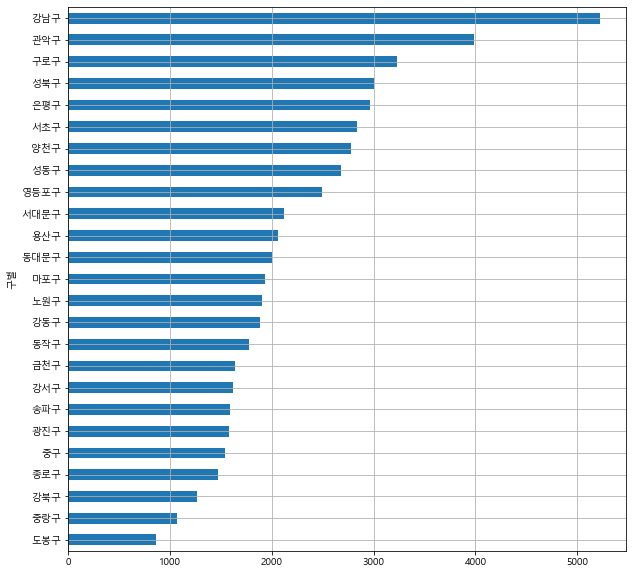

In [33]:
# 수평 bar & 정렬
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

In [34]:
# 인구대비 cctv비율 추가하기
data_result['cctv비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,5221,112.668024,550209,545169,5040,71025,0.916016,12.908731,0.948912
강동구,1879,128.033981,440390,436067,4323,63452,0.981630,14.408138,0.426667
강북구,1265,168.008475,317695,313954,3741,60577,1.177545,19.067659,0.398181
강서구,1617,228.658537,598273,591796,6477,84077,1.082616,14.053283,0.270278
관악구,3985,340.331492,517334,500094,17240,75194,3.332470,14.534904,0.770295


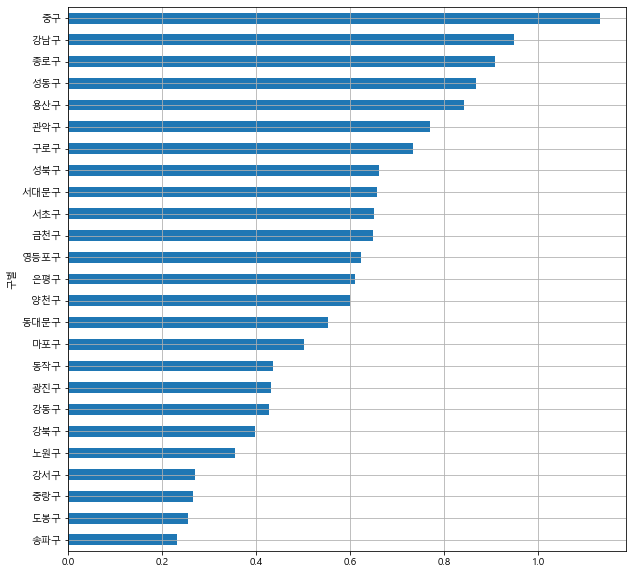

In [35]:
data_result['cctv비율'].sort_values().plot(kind='barh', grid = True, figsize=(10,10))

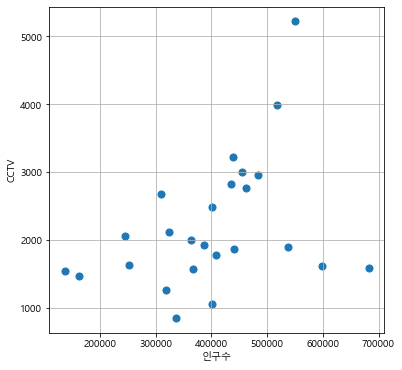

In [36]:
# 점 분포도
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [37]:
# 데이터를 대표하는 직선 만들기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.87807400e-03, 1.06722601e+03])

In [38]:
# y축 데이터 만들기
f1 = np.poly1d(fp1)
# x축 데이터 만들기
fx = np.linspace(100000, 700000, 100)

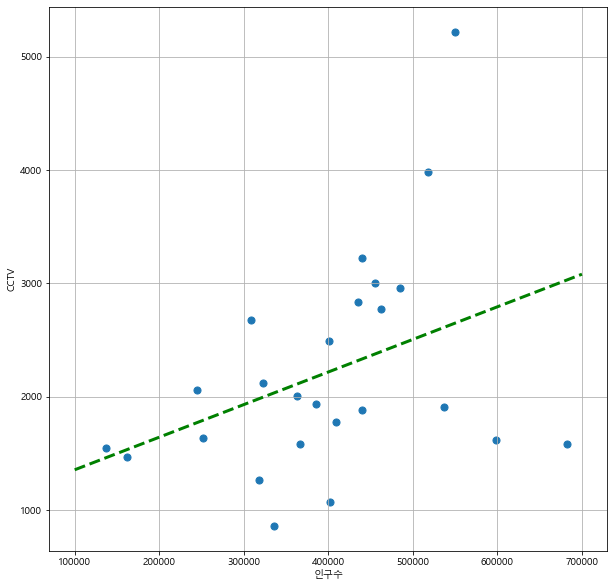

In [39]:
# 점 분포도에 직선 추가
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [40]:
# 직선에서 멀수록 marker의 색상이 달라지도록 하기, 이름 표시하기
# 오차 계산해서 열 추가하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,112.668024,550209,545169,5040,71025,0.916016,12.908731,0.948912,2570.231779
송파구,1586,101.524778,682741,675961,6780,87334,0.993056,12.791674,0.232299,1446.205124
관악구,3985,340.331492,517334,500094,17240,75194,3.332470,14.534904,0.770295,1428.848461
도봉구,858,216.605166,335631,333362,2269,58714,0.676040,17.493617,0.255638,1175.196860
강서구,1617,228.658537,598273,591796,6477,84077,1.082616,14.053283,0.270278,1172.099970


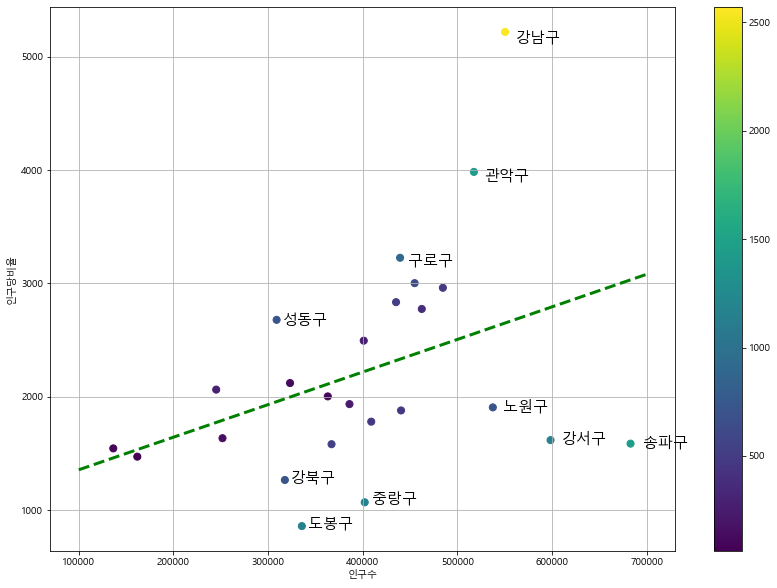

In [41]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

# 이름 표시
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

In [42]:
import seaborn as sns
sns.set()

In [48]:
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,112.668024,550209,545169,5040,71025,0.916016,12.908731,0.948912,2570.231779
강동구,1879,128.033981,440390,436067,4323,63452,0.981630,14.408138,0.426667,455.701013
강북구,1265,168.008475,317695,313954,3741,60577,1.177545,19.067659,0.398181,716.575724
강서구,1617,228.658537,598273,591796,6477,84077,1.082616,14.053283,0.270278,1172.099970
관악구,3985,340.331492,517334,500094,17240,75194,3.332470,14.534904,0.770295,1428.848461


In [74]:
# 피어슨계수 히트맵 -> 헤더를 영어로 바꿔야 보기 편함
data_result.rename(columns={data_result.columns[0] : 'cctv',
                            data_result.columns[1] : 'cctv_increase',
                            data_result.columns[2] : 'pop',
                            data_result.columns[3] : 'kor',
                            data_result.columns[4] : 'for',
                           data_result.columns[5] : 'old',
                           data_result.columns[6] : 'for_rate',
                           data_result.columns[7] : 'old_rate',
                           data_result.columns[8] : 'cctv_pop',
                           data_result.columns[9] : 'err'}, inplace = True)
data_result.head()

,cctv,cctv_increase,pop,kor,for,old,for_rate,old_rate,cctv_pop,err
구별,,,,,,,,,,
강남구,5221,112.668024,550209,545169,5040,71025,0.916016,12.908731,0.948912,2570.231779
강동구,1879,128.033981,440390,436067,4323,63452,0.981630,14.408138,0.426667,455.701013
강북구,1265,168.008475,317695,313954,3741,60577,1.177545,19.067659,0.398181,716.575724
강서구,1617,228.658537,598273,591796,6477,84077,1.082616,14.053283,0.270278,1172.099970
관악구,3985,340.331492,517334,500094,17240,75194,3.332470,14.534904,0.770295,1428.848461


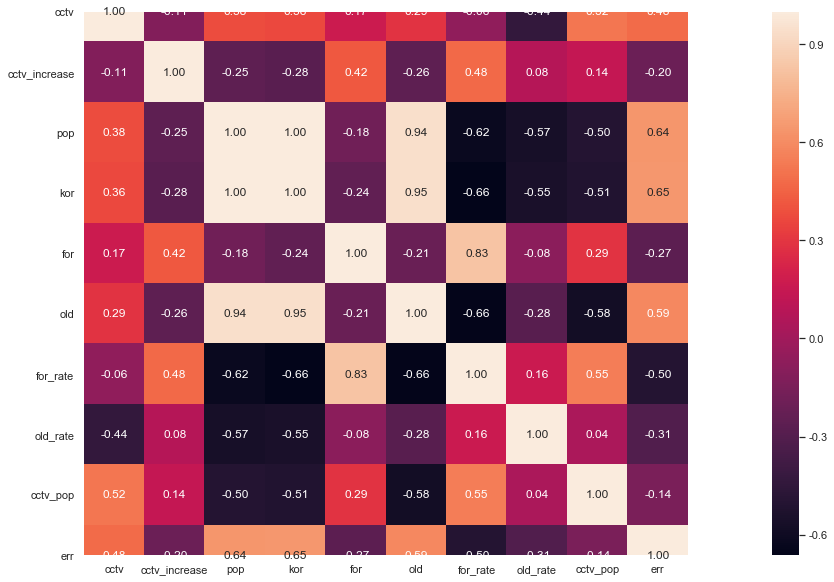

In [72]:
plt.figure(figsize = (30,10))
sns.heatmap(data_result.corr(), annot=True, fmt='.2f', square=True)
plt.show()
# pop - cctv
# for - cctv_increase 0.42
# for_rate - cctv_increase 0.48
# for_rate - cctv_pop 0.55
# --> 외국인과 cctv?!?